In [1]:
import numpy as np
from scipy.optimize import curve_fit
from astropy.io import fits,ascii
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')
%matplotlib notebook

**Warning** 

Swift observations can have multiple snapshots per observation. E.g., a 2 ks observation may be performed in 4 chunks spread out over a day or sometimes a few days (this is why there are errorbars on the time values). 

So in our case, if the separatation between two snapshots is more than ~12 hours (roughly 10% of the period), we might need to look at individual snapshots. Sadly, the problem is that typically, individual snapshots are too short for a good constraint on brightness and so errorbars become large. If you want to see the snapshot-binned lightcurves, just uncomment the plotting commands for lc2 in each plot.

In [2]:
sw_lc1 = ascii.read('./swift_lc_obsbin.txt')          # light curve binned by observation
sw_lc2 = ascii.read('./swift_lc_snapshotbin.txt')     # light curve binned by snapshot

<IPython.core.display.Javascript object>


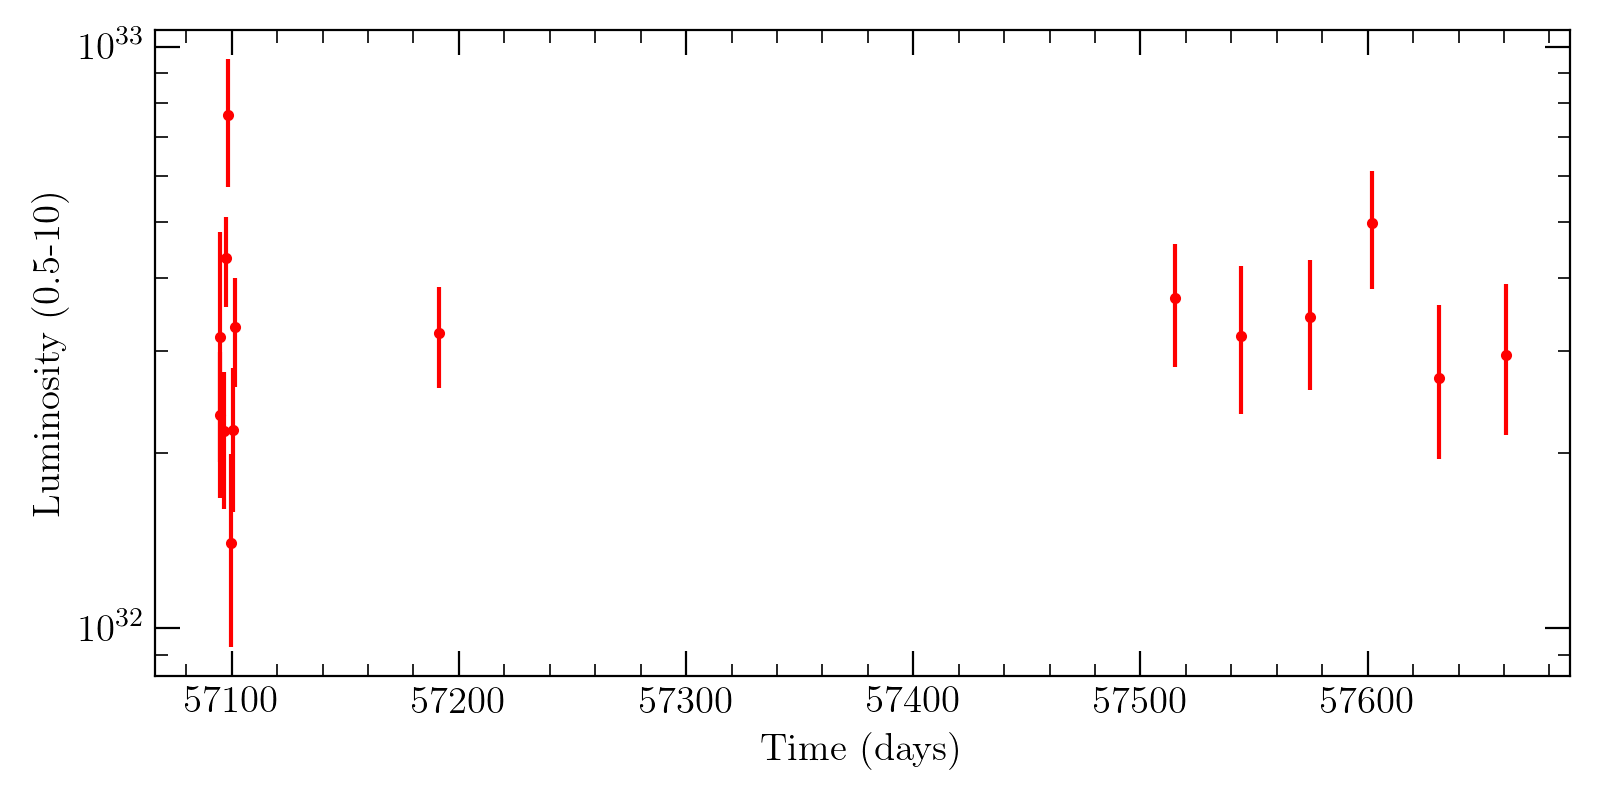

In [3]:
# Assuming NH=1.5e21 and gamma=1.41: 
# Swift/XRT PC mode countrate of 1.0 in 0.3-10 keV corresponds to a flux of 5.995E-11 in 0.5-10 keV
dist = 1.6                                            # distance in kpc
sw_lum_coef = 5.995E-11*(4*np.pi*(dist*3.08e21)**2)   # coef to convert Swift/XRT PC countrate to luminosity

plt.figure(figsize=(8,4))
plt.errorbar(sw_lc1['time'],sw_lc1['rate1']*sw_lum_coef,
             yerr=[-sw_lc1['rate1_ler']*sw_lum_coef,sw_lc1['rate1_uer']*sw_lum_coef],
             xerr=[-sw_lc1['time_ler'],sw_lc1['time_uer']],
             fmt='.r')
#plt.errorbar(sw_lc2['time'],sw_lc2['rate1']*sw_lum_coef,
#             yerr=[-sw_lc2['rate1_ler']*sw_lum_coef,sw_lc2['rate1_uer']*sw_lum_coef],
#             xerr=[-sw_lc2['time_ler'],sw_lc2['time_uer']],
#             fmt='.k',alpha=0.2)

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Luminosity (0.5-10)', fontsize=14)
plt.yscale('log')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on', top='on')
plt.tight_layout()
plt.savefig('./swift_lc_allobs.pdf')

<IPython.core.display.Javascript object>


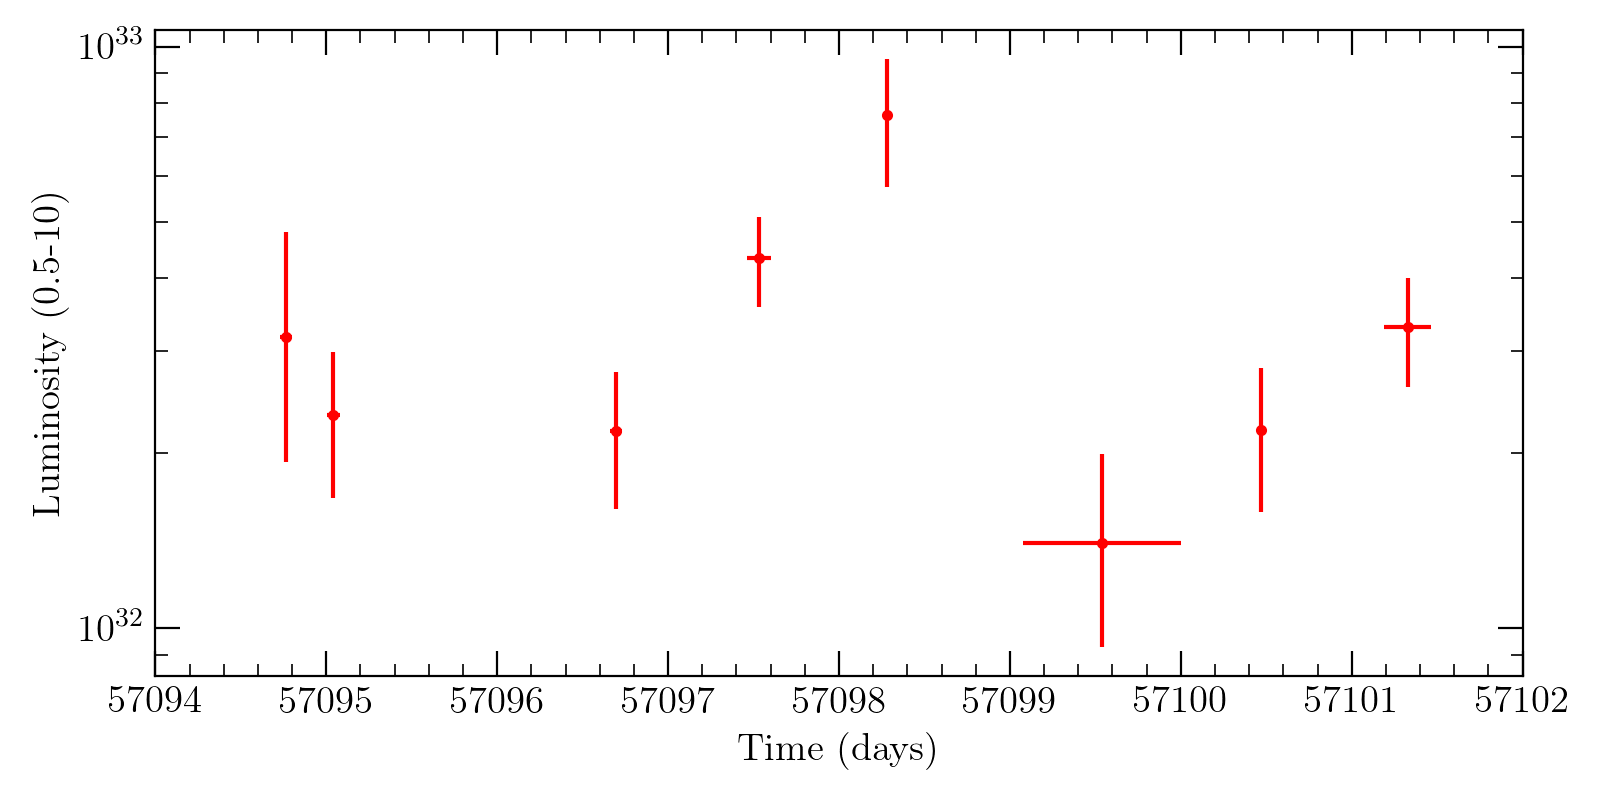

In [4]:
plt.figure(figsize=(8,4))
plt.errorbar(sw_lc1['time'],sw_lc1['rate1']*sw_lum_coef,
             yerr=[-sw_lc1['rate1_ler']*sw_lum_coef,sw_lc1['rate1_uer']*sw_lum_coef],
             xerr=[-sw_lc1['time_ler'],sw_lc1['time_uer']],
             fmt='.r')
#plt.errorbar(sw_lc2['time'],sw_lc2['rate1']*sw_lum_coef,
#             yerr=[-sw_lc2['rate1_ler']*sw_lum_coef,sw_lc2['rate1_uer']*sw_lum_coef],
#             xerr=[-sw_lc2['time_ler'],sw_lc2['time_uer']],
#             fmt='.k',alpha=0.2)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Luminosity (0.5-10)', fontsize=14)
plt.xlim(57094,57102)
plt.yscale('log')
plt.minorticks_on()
plt.ticklabel_format(axis='x',useOffset=False)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on', top='on')
plt.tight_layout()
plt.savefig('./swift_lc_8days.pdf')

### Folded light curve

<IPython.core.display.Javascript object>


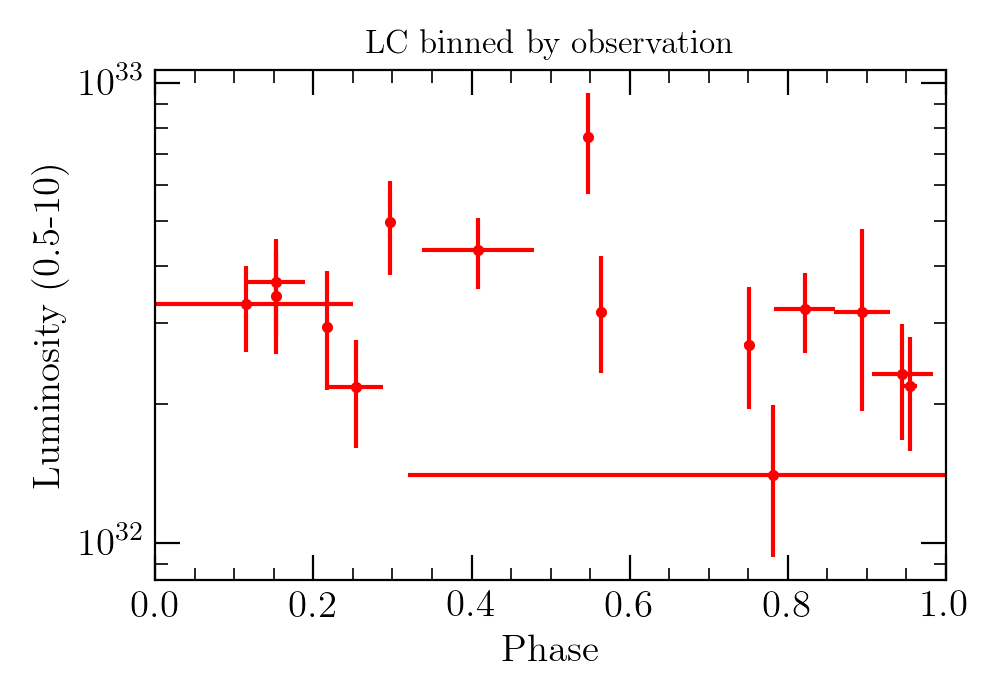

<IPython.core.display.Javascript object>


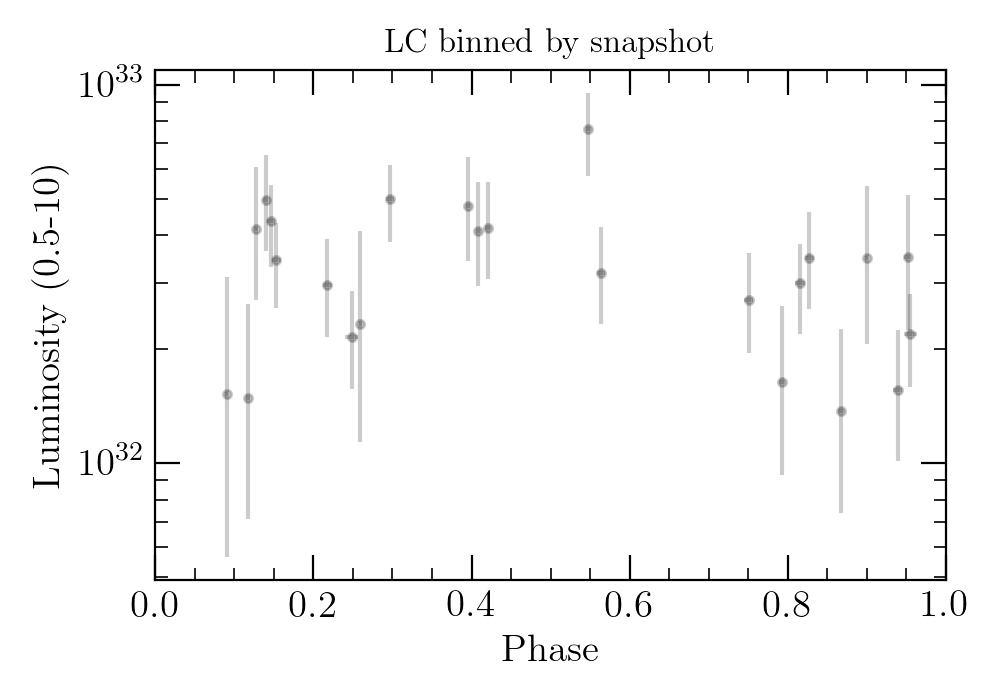

In [5]:
period = 5.37372                      # period in days 
phase0 = 57111.457                    # t at phase = 0 in MJD

fold_t1 = ((sw_lc1['time']-phase0)/period)%1
fold_t2 = ((sw_lc2['time']-phase0)/period)%1

plt.figure(figsize=(5,3.5))
plt.title('LC binned by observation')
plt.errorbar(fold_t1,sw_lc1['rate1']*sw_lum_coef,
             yerr=[-sw_lc1['rate1_ler']*sw_lum_coef,sw_lc1['rate1_uer']*sw_lum_coef],
             xerr=[-sw_lc1['time_ler'],sw_lc1['time_uer']],
             fmt='.r')
plt.xlim(0,1)
plt.xlabel('Phase', fontsize=14)
plt.ylabel('Luminosity (0.5-10)', fontsize=14)
plt.yscale('log')
plt.minorticks_on()
plt.ticklabel_format(axis='x',useOffset=False)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on', top='on')
plt.tight_layout()
plt.savefig('./swift_folded_lc1.pdf')

plt.figure(figsize=(5,3.5))
plt.title('LC binned by snapshot')
plt.errorbar(fold_t2,sw_lc2['rate1']*sw_lum_coef,
             yerr=[-sw_lc2['rate1_ler']*sw_lum_coef,sw_lc2['rate1_uer']*sw_lum_coef],
             xerr=[-sw_lc2['time_ler'],sw_lc2['time_uer']],
             fmt='.k',alpha=0.2)
plt.xlim(0,1)
plt.xlabel('Phase', fontsize=14)
plt.ylabel('Luminosity (0.5-10)', fontsize=14)
plt.yscale('log')
plt.minorticks_on()
plt.ticklabel_format(axis='x',useOffset=False)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on', top='on')
plt.tight_layout()
plt.savefig('./swift_folded_lc2.pdf')

Thoughts: I think there is weak suggestive evidence for a trend from phase=0 to peak at phase~0.5, but that's pretty much it...